In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
from astropy.io import fits


In [50]:
dir = './'
sci = dir + 'a0098.fits'


In [51]:
sci_hdu = fits.open(sci)
galaxy15 = sci_hdu[0].data
exptime = sci_hdu[0].header['EXPTIME']
sci_im = galaxy15 / exptime
ilum = np.arange(40,180)


In [54]:
import warnings
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, '
             'so results might be incorrect.')
)

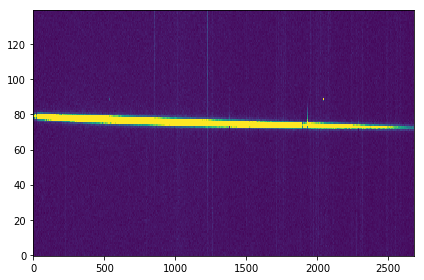

In [55]:
plt.imshow(sci_im[ilum,:], origin='lower', aspect='auto')
plt.clim(np.percentile(sci_im[ilum,:], (0, 98)))
plt.show()


In [56]:
import trace

In [57]:
# Run the measuring function by itself
xbins, ybins = trace.measure_trace(sci_im, dofit=False)
print(xbins, ybins)

[  67.   201.   335.   469.   603.   737.   871.  1005.  1139.  1273.5
 1408.  1542.  1676.  1810.  1944.  2078.  2212.  2346.  2480.  2614.5] [118.79591479 118.25309269 117.74184781 117.28392004 116.86384144
 116.46979422 116.08652566 115.73934662 115.40404374 115.080083
 114.78015266 114.4860447  114.19978746 113.92888406 113.66743689
 113.42191087 113.17339921 112.94927997 112.72887965 112.51366693]


/Users/bjw/software/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


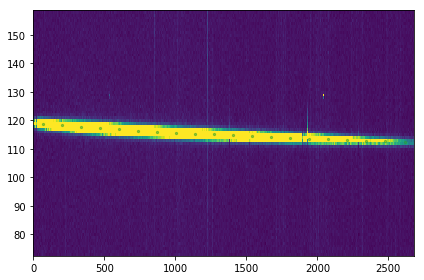

In [44]:
plt.imshow(sci_im, origin='lower', aspect='auto')
plt.clim(np.percentile(sci_im[ilum,:], (0, 98)))
plt.scatter(xbins, ybins, s=5, color='C2', alpha=0.5)
plt.ylim(ybins.min()-40, ybins.max()+40)
plt.show()


In [45]:
# Define a trace model from the Trace class
sci_tracemod = trace.Trace('chebyshev')
trace_model = sci_tracemod.compute_trace1d(sci_im)
print(sci_tracemod.w_ref, sci_tracemod.s_ref)


1341 114.92928677541914


In [46]:
nxpix = sci_im.shape[1]
xpix = np.arange(0,nxpix)

# Compute the y pixels of the trace that correspond to the x pixels using our model
trace_ypix = sci_tracemod.return_trace(xpix)


/Users/bjw/software/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


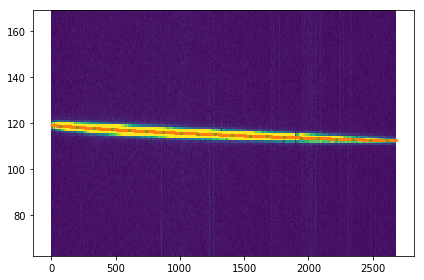

In [47]:
plt.imshow(sci_im, origin='lower', aspect='auto')
plt.clim(np.percentile(sci_im[ilum,:], (0, 98)))
plt.scatter(xpix, trace_ypix, s=3, color='C1', alpha=0.5)
plt.scatter(xbins, ybins, s=5, color='C2', alpha=0.5)
plt.ylim(trace_ypix.min()-50, trace_ypix.max()+50)
plt.show()


In [48]:
# Compute a 2D model of the trace - it's just offsetting the trace by 
# a constant amount for now
trace_2d_model = sci_tracemod.compute_trace2d(sci_im)


TypeError: compute_trace1d() takes 2 positional arguments but 3 were given